# Missing Values - Feature Engineering 

In [1]:
# Import all libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [11]:
df['cabin_null'].mean()

0.7710437710437711

In [12]:
# 1) Mean/Median/Mode

In [14]:
df2 = pd.read_csv('Dataset/titanic.csv',usecols=['Age','Survived','Fare'])

In [16]:
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
def impute_nan(df,variable,median):
    df[variable + 'median'] = df[variable].fillna(median)

In [19]:
median = df2.Age.median()

In [20]:
median

28.0

In [21]:
impute_nan(df2,'Age',median)

In [22]:
df2.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [27]:
print(df2['Age'].std())
print(df2['Agemedian'].std())

14.526497332334044
13.019696550973194


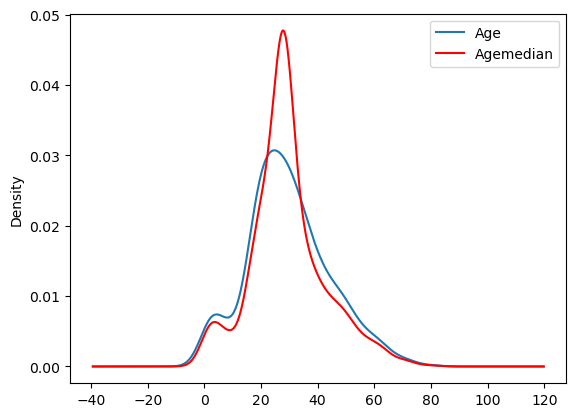

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df2['Age'].plot(kind='kde', ax=ax)
df2.Agemedian.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') 